In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact ,IntSlider
from keras.models import Sequential
from keras.layers.core import Dense ,Activation
from keras.optimizers import SGD ,Adam

#data sets
from keras.datasets import mnist

from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, add

In [45]:
(x_train_temp , y_train_temp),(x_test_temp ,y_test_temp)=mnist.load_data()

In [46]:
x_train=x_train_temp.reshape((60000,28*28))
x_test =x_test_temp.reshape((10000,28*28))

x_train -= x_train.min()
x_train =x_train/x_train.max()
x_test -= x_test.min()
x_test =x_test/x_test.max()

In [47]:
y_train=to_categorical(y_train_temp ,10)
y_test =to_categorical(y_test_temp,10)
#one_hot 

In [48]:
x=Input(shape=(784,))
print(x)

Tensor("input_4:0", shape=(?, 784), dtype=float32)


<img src="1.jpg" alt="drawing" style="width: 400px;"/>

In [49]:
f00=Dense(1000,activation="relu")

f11=Dense(250,activation="relu")
f12=Dense(250,activation="relu")
f13=Dense(250,activation="sigmoid")
f14=Dense(250,activation="sigmoid")

f21=Dense(1000,activation="relu")
f22=Dense(1000,activation="relu")

f31=Dense(750,activation="relu")
f4=Dense(10,activation="softmax")

h1=f00(x)

h21=f11(h1)
h22=f12(h1)
h23=f13(h1)
h24=f14(h1)

u1=concatenate([h21 ,h22])
u2=concatenate([h23 ,h24])

h31=f21(u1)
h32=f22(u2)
u3=concatenate([h31 ,h32])
h4=f31(u3)
y=f4(h4)


In [50]:
model_div=Model(x,y)

In [51]:
model_div.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 1000)         785000      input_4[0][0]                    
__________________________________________________________________________________________________
dense_29 (Dense)                (None, 250)          250250      dense_28[0][0]                   
__________________________________________________________________________________________________
dense_30 (Dense)                (None, 250)          250250      dense_28[0][0]                   
__________________________________________________________________________________________________
dense_31 (

In [52]:
model_div.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['acc'])

In [53]:
a=model_div.fit(x_train, y_train, batch_size=1000, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.5122 - acc: 0.8448
Epoch 2/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.1126 - acc: 0.9656
Epoch 3/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0670 - acc: 0.9793
Epoch 4/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0430 - acc: 0.9866
Epoch 5/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0304 - acc: 0.9903
Epoch 6/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0205 - acc: 0.9937
Epoch 7/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0155 - acc: 0.9951
Epoch 8/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0172 - acc: 0.9945
Epoch 9/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0111 - acc: 0.9965
Epoch 10/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0118 - acc: 0.9961

In [54]:
from keras.utils import np_utils

In [55]:
score = model_div.evaluate(x_train, y_train, batch_size=100)
print('loss:', score[0])
print('正確率:', score[1])

60000/60000 [==============================] - 1s 21us/step
loss: 0.010447094052318183
正確率: 0.9965666699409484


Text(0, 0.5, 'accuracy')

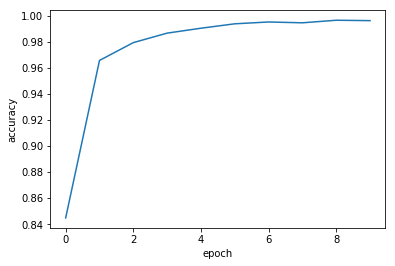

In [56]:
plt.plot(a.history['acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

Text(0, 0.5, 'Loss')

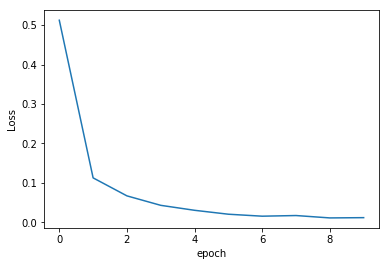

In [57]:
plt.plot(a.history['loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')